In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:26<00:00, 38.7MB/s]
100% 1.06G/1.06G [00:27<00:00, 42.2MB/s]


In [ ]:
import zipfile
zip_ref=zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
train_ds=keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256)
)

validation_ds=keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
#Normalize
def process(image,label):
  image=tf.cast(image/255,tf.float32)
  return image,label

train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)

In [ ]:
#model building
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(train_ds,epochs=9,validation_data=validation_ds,)

Epoch 1/9
625/625 [==============================] - 70s 112ms/step - loss: 0.5377 - accuracy: 0.7538 - val_loss: 0.5181 - val_accuracy: 0.7630
Epoch 2/9
625/625 [==============================] - 68s 108ms/step - loss: 0.4835 - accuracy: 0.7819 - val_loss: 0.4795 - val_accuracy: 0.7848
Epoch 3/9
625/625 [==============================] - 68s 108ms/step - loss: 0.4368 - accuracy: 0.8106 - val_loss: 0.6659 - val_accuracy: 0.7274
Epoch 4/9
625/625 [==============================] - 65s 104ms/step - loss: 0.3941 - accuracy: 0.8365 - val_loss: 0.4670 - val_accuracy: 0.8018
Epoch 5/9
625/625 [==============================] - 65s 103ms/step - loss: 0.3622 - accuracy: 0.8535 - val_loss: 0.9156 - val_accuracy: 0.6792
Epoch 6/9
625/625 [==============================] - 68s 108ms/step - loss: 0.3313 - accuracy: 0.8725 - val_loss: 0.4748 - val_accuracy: 0.8014
Epoch 7/9
625/625 [==============================] - 68s 108ms/step - loss: 0.3028 - accuracy: 0.8856 - val_loss: 0.7711 - val_accuracy:

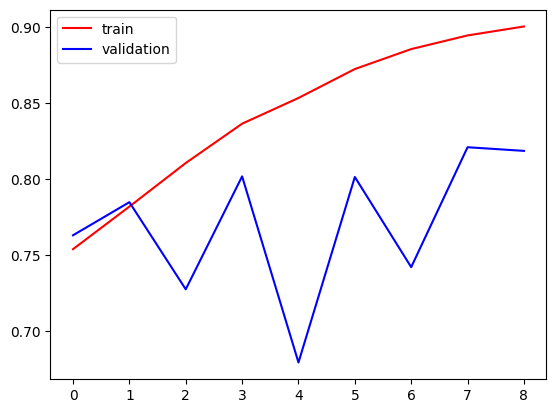

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
import cv2

In [ ]:
test_img=cv2.imread('/content/pexels-svetozar-milashevich-1490908.jpg')

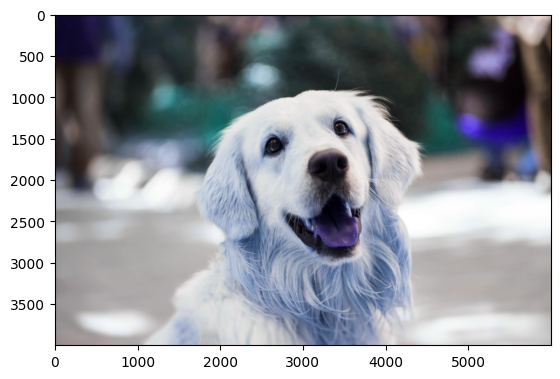

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(4000, 6000, 3)

In [ ]:
test_img=cv2.resize(test_img,(256,256))

In [ ]:
test_input=test_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 479ms/step


array([[1.]], dtype=float32)